# LGMVIP - DataScience Intern, April-2022 

## Author : Shubham Mehar

## INTERMEDIATE LEVEL TASK

## TASK 2 : Prediction using Decision Tree  Algorithm
## The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset link-https://bit.ly/3kXTdox

In [2]:
#Reading csv file
iris=pd.read_csv("Iris.csv")

In [3]:
#Checking dataframe
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking dimensionality
iris.shape

(150, 6)

In [5]:
# Checking info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking the missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Checking descriptive statistics
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Droppind Id column
iris.drop(["Id"],axis=1,inplace=True)

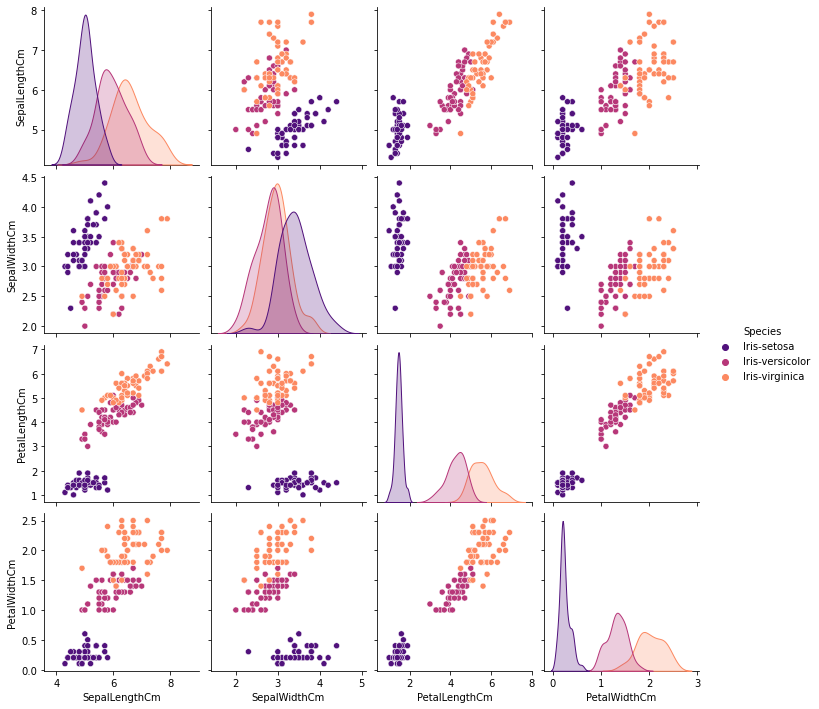

In [9]:
# Plotting Pairplot

sns.pairplot(iris,hue='Species',palette='magma')

**Iris Setosa are easily separable in most of the plots.**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


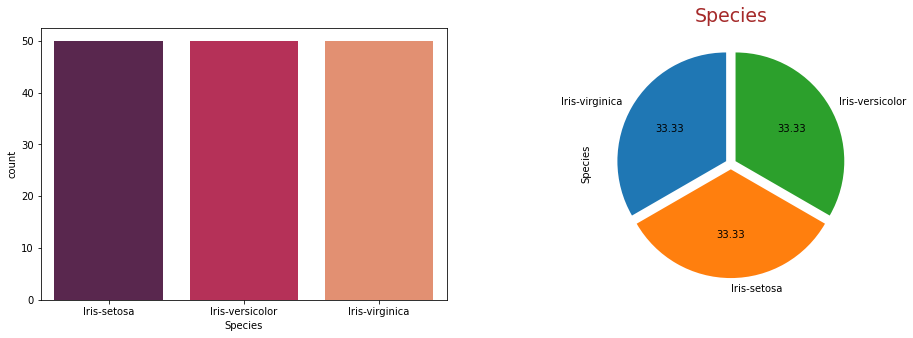

In [10]:
#Checking data ditribution based on class

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(iris["Species"],palette="rocket")

plt.subplot(1,2,2)
iris["Species"].value_counts().plot(kind="pie",autopct="%.2f", explode=(0.05,0.05,0.05),startangle=90)
plt.title("Species", fontsize= 19, c= "brown")
plt.show()

Iris flower species data is equally taken in the dataset.

<AxesSubplot:>

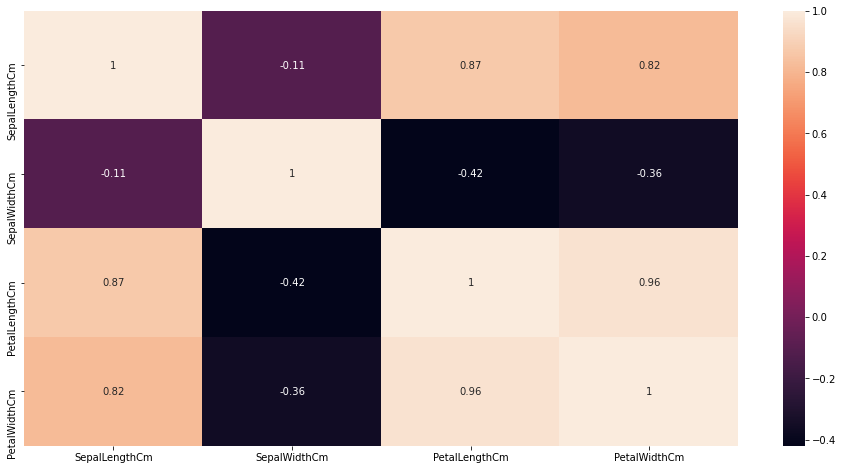

In [11]:
#heatmap
plt.figure(figsize=(16,8))
sns.heatmap(iris.corr(), annot=True, cmap="rocket")

•	Sepal width showing negative correlation with all the features.

•	Petal length and petal width have high positive correlation.

### Set a variable X equal to the features and a variable y equal to the target column.

In [12]:
# X for features
X = iris.drop(['Species'],axis=1)

#y for target column
y = iris['Species']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. Taking training data 80% and 20% for model testing.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=19)

# Training a DecisionTreeClassifier Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier() # dtree is instance of  DecisionTreeClassifier

In [17]:
dtree.fit(X_train,y_train)       # fitting training data

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [20]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [21]:
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


<Figure size 504x504 with 0 Axes>

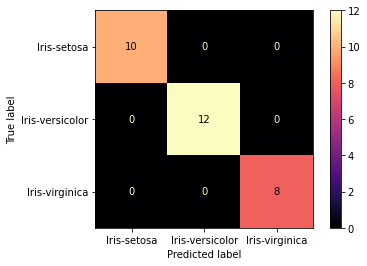

In [22]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(dtree,X_test,y_test,cmap='magma')

# Tree Visualization

In [23]:
from sklearn import tree

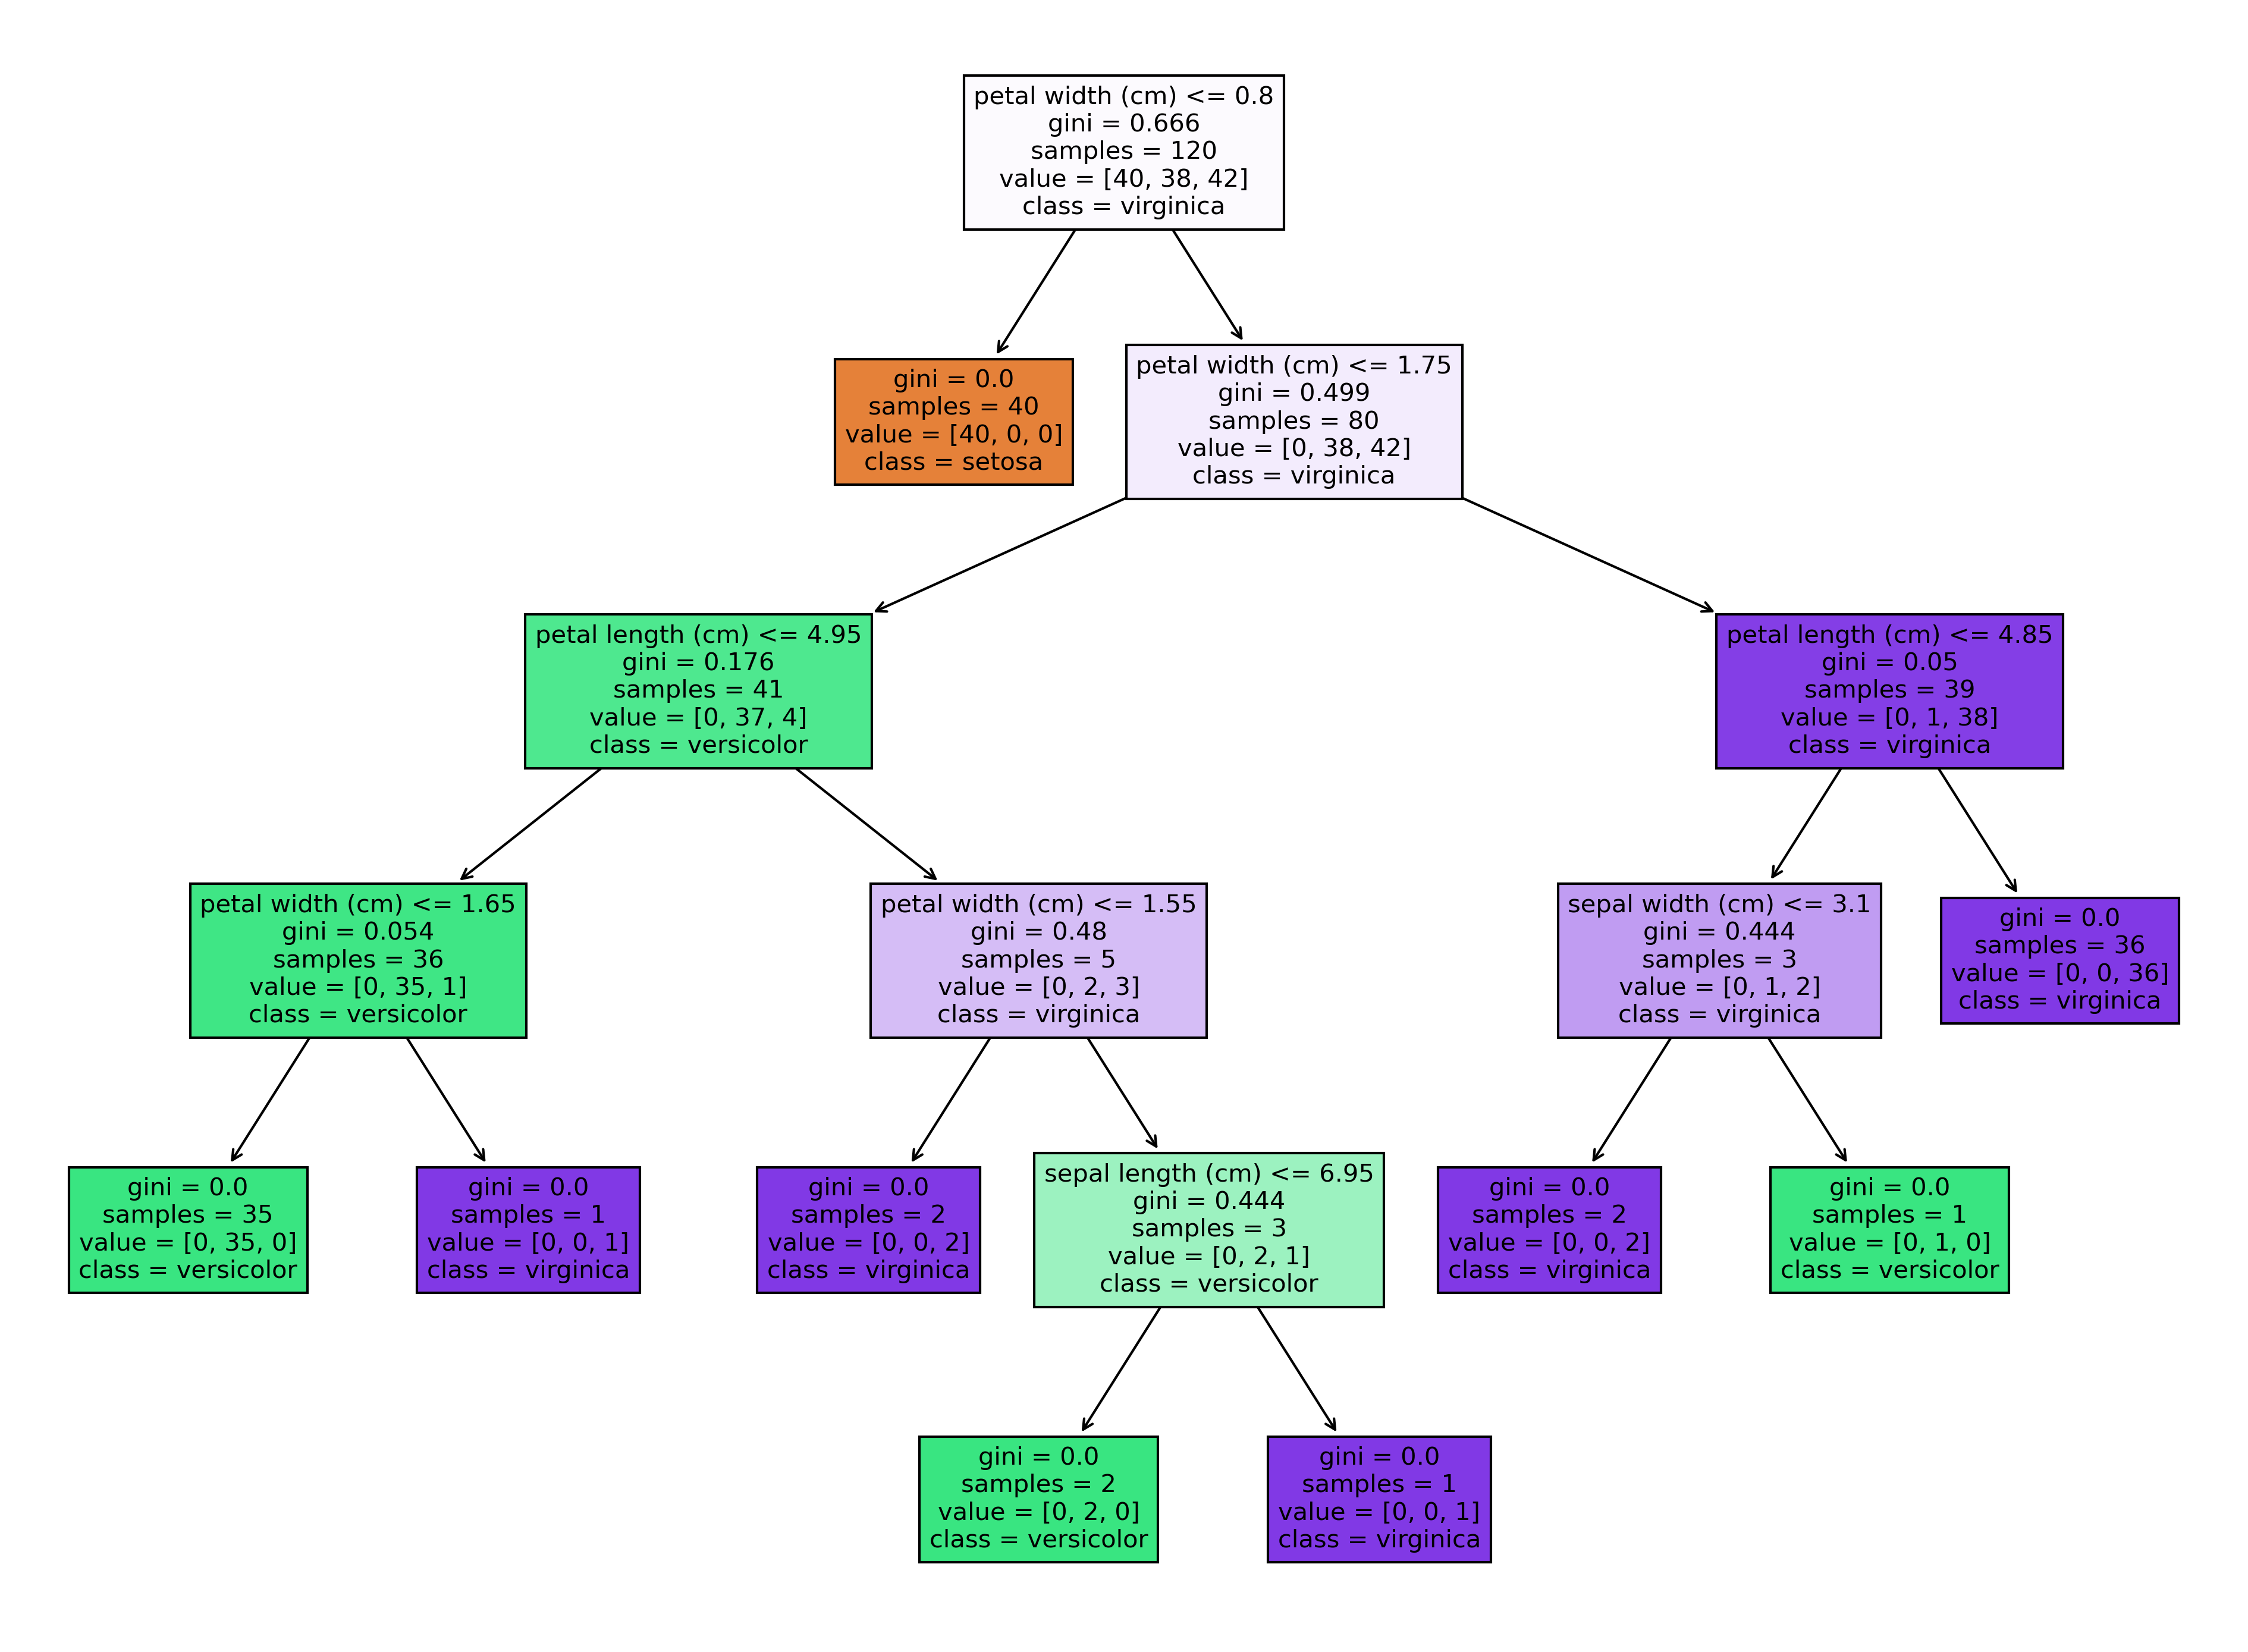

<Figure size 432x288 with 0 Axes>

In [24]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,12), dpi=300)
tree.plot_tree(dtree,feature_names = fn, class_names=cn,fontsize=10,filled = True);
plt.show()
plt.tight_layout()

### The purpose is if we feed any new data to this classifier, it would be able to predict the right species accordingly.

In [25]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
def prediction():
    SepalLengthCm=input("sepal length:")
    SepalWidthCm=input("sepal width:")
    PetalLengthCm=input("petal length:")
    PetalWidthCm=input("petal width:")

    result = dtree.predict([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])
    
    if result == "Iris-setosa":
        return "The Species of iris flower is 'Iris Setosa'"
    
    elif result =='Iris-versicolor':
        return "The Species of iris flower is 'Iris Versicolour'"
    else:
        return "The Species of iris flower is 'Iris Virginica'"

In [28]:
#sepal length:5.1, sepal width:3.5, petal length:1.4,petal width:0.2
prediction()

sepal length:5.1
sepal width:3.5
petal length:1
petal width:0.2


"The Species of iris flower is 'Iris Setosa'"

In [29]:
#sepal length:7.0, sepal width:3.2, petal length:4.7,petal width:1.4
prediction()

sepal length:7.0
sepal width:3.2
petal length:4.7
petal width:1.4


"The Species of iris flower is 'Iris Versicolour'"

In [30]:
#sepal length:6.7, sepal width:3.0, petal length:5.2,petal width:2.3
prediction()

sepal length:6.7
sepal width:3.0
petal length:5.2
petal width:2.3


"The Species of iris flower is 'Iris Virginica'"

## Our model is predicting the correct species of Iris flower.